In [1]:
import numpy as np
import matplotlib.pyplot as plt

from IPython import display
display.set_matplotlib_formats('svg')

/tmp/ipykernel_11537/2884596146.py:5: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


### Create Function and its derivative

In [2]:
x=np.linspace(-2,2,2001)

def f(x):
    return 3*x**2 - 3*x + 4

def df(x):
    return 6*x - 3

##### G.D using fixed learning rate

In [ ]:
localmin=np.random.choice(x,1)
initval=localmin[:]# copied

learning_rate=.01
training_epochs=50

modelParamsFixed=np.zeros(shape=(training_epochs,3))

for i in range(training_epochs):
    grad=df(localmin)

    lr=learning_rate

    localmin=localmin-lr*grad
    
    modelParamsFixed[i,0]=localmin
    modelParamsFixed[i,1]=grad
    modelParamsFixed[i,2]=lr

/tmp/ipykernel_11537/3722706758.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelParamsFixed[i,0]=localmin
/tmp/ipykernel_11537/3722706758.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelParamsFixed[i,1]=grad


##### G.D using gradient-based learning rate

In [7]:
localmin=np.random.choice(x,1)
initval=localmin[:]# copied

learning_rate=.01
training_epochs=50

modelParamsGrad=np.zeros(shape=(training_epochs,3))

for i in range(training_epochs):
    grad=df(localmin)

    lr=learning_rate*np.abs(grad)

    localmin=localmin-lr*grad
    
    modelParamsGrad[i,0]=localmin
    modelParamsGrad[i,1]=grad
    modelParamsGrad[i,2]=lr

/tmp/ipykernel_11537/1889576524.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelParamsGrad[i,0]=localmin
/tmp/ipykernel_11537/1889576524.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelParamsGrad[i,1]=grad
/tmp/ipykernel_11537/1889576524.py:18: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelParamsGrad[i,2]=lr


##### G.D using a time based learning rate

In [8]:
learning_rate=.1
localmin=initval

modelParamsTime=np.zeros((training_epochs,3))
for i in range(training_epochs):
    grad = df(localmin)
    lr=learning_rate*(1-(i+1)/training_epochs)
    localmin=localmin-lr*grad
    modelParamsTime[i,0]=localmin
    modelParamsTime[i,1]=grad
    modelParamsTime[i,2]=lr

/tmp/ipykernel_11537/233539434.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelParamsTime[i,0]=localmin
/tmp/ipykernel_11537/233539434.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  modelParamsTime[i,1]=grad


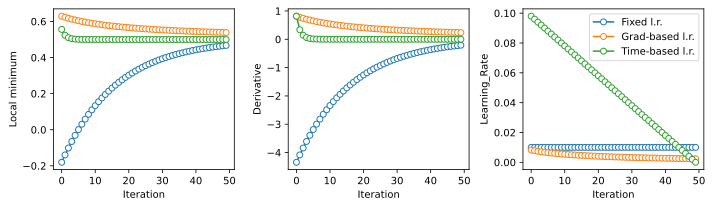

In [9]:
fig,ax=plt.subplots(1,3,figsize=(10,3))

for i in range(3):
    ax[i].plot(modelParamsFixed[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelParamsGrad[:,i],'o-',markerfacecolor='w')
    ax[i].plot(modelParamsTime[:,i],'o-',markerfacecolor='w')
    ax[i].set_xlabel('Iteration')

ax[0].set_ylabel('Local minimum')
ax[1].set_ylabel('Derivative')
ax[2].set_ylabel('Learning_Rate')
ax[2].legend(['Fixed l.r.','Grad-based l.r.','Time-based l.r.'])

plt.tight_layout()
plt.show()